In [77]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

In [78]:
from geopy.distance import great_circle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler , StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error , r2_score

In [79]:
%matplotlib inline 

In [80]:
sns.set_theme(context = 'notebook' , style = 'whitegrid' , palette = 'coolwarm' , font_scale = 1.1 , 
             rc = {'figure.figsize' : (8 , 4)})

In [81]:
warnings.filterwarnings('ignore')

In [82]:
df = pd.read_csv('uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [83]:
df.drop(['Unnamed: 0' , 'key'] , axis = 1, inplace = True)

In [84]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [85]:
df.isnull().mean()*100

fare_amount          0.0000
pickup_datetime      0.0000
pickup_longitude     0.0000
pickup_latitude      0.0000
dropoff_longitude    0.0005
dropoff_latitude     0.0005
passenger_count      0.0000
dtype: float64

In [86]:
df.dropna(axis = 0 , inplace = True)

In [87]:
df.isnull().mean()*100

fare_amount          0.0
pickup_datetime      0.0
pickup_longitude     0.0
pickup_latitude      0.0
dropoff_longitude    0.0
dropoff_latitude     0.0
passenger_count      0.0
dtype: float64

In [88]:
df.duplicated().sum()

0

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199999 non-null  float64
 1   pickup_datetime    199999 non-null  object 
 2   pickup_longitude   199999 non-null  float64
 3   pickup_latitude    199999 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 12.2+ MB


In [90]:
def get_distance (data):
    try :
        pickup = (data['pickup_latitude'],data['pickup_longitude'])
        dropoff = (data['dropoff_latitude'],data['dropoff_longitude'])
        return great_circle(pickup , dropoff).kilometers
    except :
        return np.nan

In [91]:
df['Distance'] = df.apply(get_distance , axis = 1)

In [92]:
df.isnull().mean()*100

fare_amount          0.0000
pickup_datetime      0.0000
pickup_longitude     0.0000
pickup_latitude      0.0000
dropoff_longitude    0.0000
dropoff_latitude     0.0000
passenger_count      0.0000
Distance             0.0025
dtype: float64

In [93]:
df.dropna(axis = 0 , inplace = True )

In [94]:
df.reset_index(inplace = True , drop = True)

In [95]:
df.drop(['pickup_longitude' , 'pickup_latitude' , 'dropoff_longitude' , 'dropoff_latitude'] ,
        axis = 1 , inplace = True)

In [96]:
df

,fare_amount,pickup_datetime,passenger_count,Distance
0,7.5,2015-05-07 19:52:06 UTC,1,1.683325
1,7.7,2009-07-17 20:04:56 UTC,1,2.457593
2,12.9,2009-08-24 21:45:00 UTC,1,5.036384
3,5.3,2009-06-26 08:22:21 UTC,3,1.661686
4,16.0,2014-08-28 17:47:00 UTC,5,4.475456
...,...,...,...,...
199989,3.0,2012-10-28 10:49:00 UTC,1,0.112210
199990,7.5,2014-03-14 01:09:00 UTC,1,1.875053
199991,30.9,2009-06-29 00:42:00 UTC,2,12.850337
199992,14.5,2015-05-20 14:56:25 UTC,1,3.539720


In [97]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'] , errors = 'coerce')

In [98]:
df.isnull().mean()*100

fare_amount        0.0
pickup_datetime    0.0
passenger_count    0.0
Distance           0.0
dtype: float64

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199994 entries, 0 to 199993
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   fare_amount      199994 non-null  float64            
 1   pickup_datetime  199994 non-null  datetime64[ns, UTC]
 2   passenger_count  199994 non-null  int64              
 3   Distance         199994 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(2), int64(1)
memory usage: 6.1 MB


In [100]:
df['Year'] = df['pickup_datetime'].dt.year

In [101]:
df['month'] = df['pickup_datetime'].dt.month

In [102]:
df['day'] = df['pickup_datetime'].dt.day

In [103]:
df['Hour'] = df['pickup_datetime'].dt.hour

In [104]:
df.drop(['pickup_datetime'] , inplace = True , axis = 1)

<AxesSubplot:>

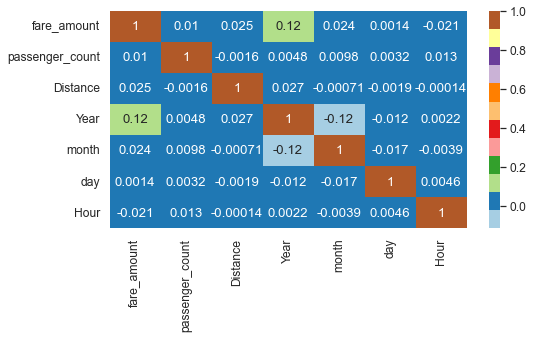

In [105]:
sns.heatmap(df.corr() , annot = True , cmap = 'Paired')

<AxesSubplot:xlabel='Distance', ylabel='fare_amount'>

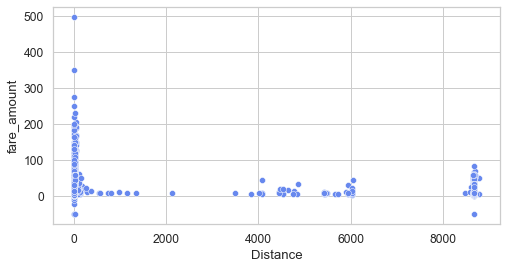

In [106]:
sns.scatterplot(data = df , x = df['Distance'] , y = df['fare_amount'])

<AxesSubplot:xlabel='Distance'>

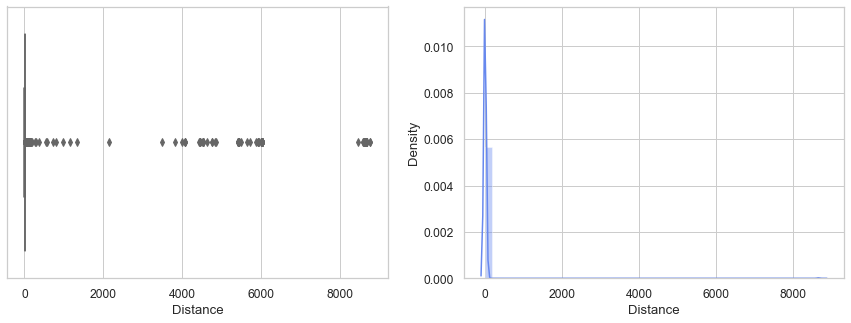

In [107]:
fig , axis = plt.subplots(ncols = 2 , nrows = 1 , figsize = (15 , 5))
sns.distplot(df['Distance'] , ax = axis[1])
sns.boxplot(df['Distance'] , ax = axis[0])

In [108]:
df.drop(df[df['Distance'] > 2000].index , axis = 0 , inplace = True)

<AxesSubplot:xlabel='Distance'>

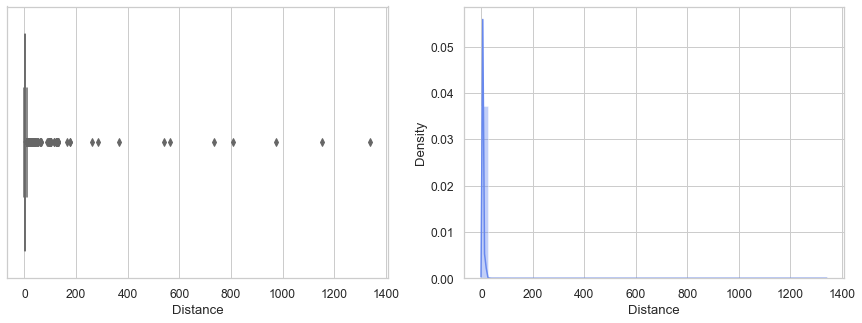

In [109]:
fig , axis = plt.subplots(ncols = 2 , nrows = 1 , figsize = (15 , 5))
sns.distplot(df['Distance'] , ax = axis[1])
sns.boxplot(df['Distance'] , ax = axis[0])

In [110]:
df.drop(df[df['Distance'] > 200 ].index , inplace = True , axis = 0)

<AxesSubplot:xlabel='Distance'>

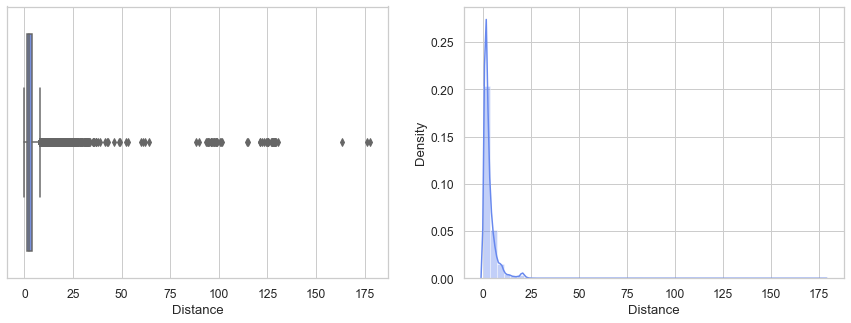

In [111]:
fig , axis = plt.subplots(ncols = 2 , nrows = 1 , figsize = (15 , 5))
sns.distplot(df['Distance'] , ax = axis[1])
sns.boxplot(df['Distance'] , ax = axis[0])

In [112]:
df.drop(df[df['Distance'] > 50].index , axis = 0 , inplace = True)

<AxesSubplot:xlabel='Distance'>

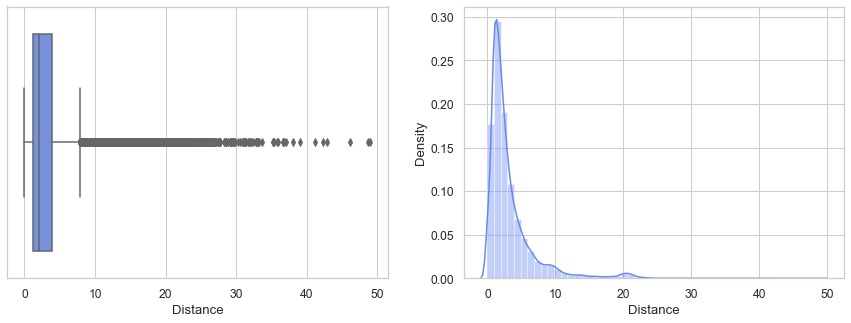

In [113]:
fig , axis = plt.subplots(ncols = 2 , nrows = 1 , figsize = (15 , 5))
sns.distplot(df['Distance'] , ax = axis[1])
sns.boxplot(df['Distance'] , ax = axis[0])

<AxesSubplot:xlabel='Distance', ylabel='fare_amount'>

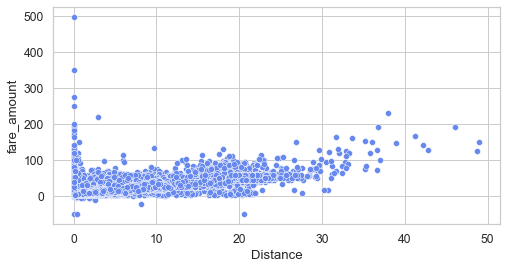

In [114]:
sns.scatterplot(data = df , x = 'Distance' , y = 'fare_amount')

In [115]:
df.drop(df[(df['Distance'] == 0) | (df['Distance'] > 40)].index , axis = 0 , inplace = True)

<AxesSubplot:xlabel='Distance', ylabel='fare_amount'>

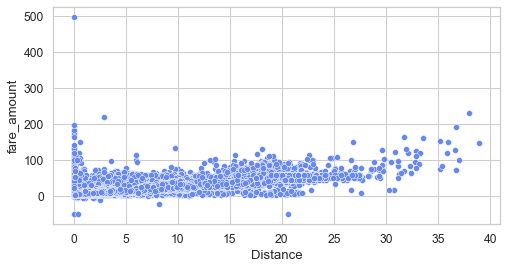

In [116]:
sns.scatterplot(data = df , x = 'Distance' , y = 'fare_amount')

In [117]:
df.drop(df[(df['Distance'] < 5) & (df['fare_amount'] > 100)].index , axis = 0 ,inplace = True)

<AxesSubplot:xlabel='Distance', ylabel='fare_amount'>

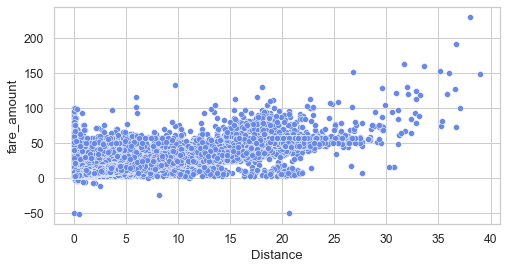

In [118]:
sns.scatterplot(data = df , x = 'Distance' , y = 'fare_amount')

In [119]:
df.drop(df[df['fare_amount'] < 0].index , inplace = True, axis = 0)

<AxesSubplot:xlabel='Distance', ylabel='fare_amount'>

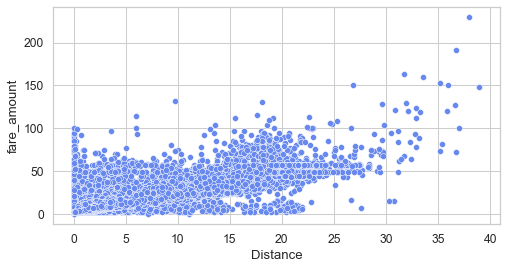

In [120]:
sns.scatterplot(data = df , x = 'Distance' , y = 'fare_amount')

<AxesSubplot:xlabel='Distance', ylabel='fare_amount'>

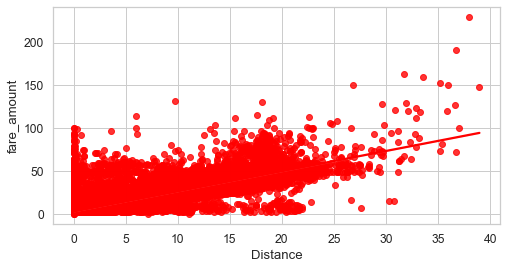

In [121]:
sns.regplot(data = df , x = 'Distance' , y = 'fare_amount' , color = 'r')

<AxesSubplot:>

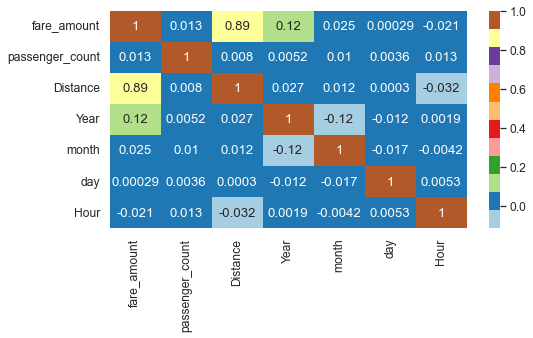

In [122]:
sns.heatmap(df.corr() , annot = True , cmap = 'Paired')

In [123]:
df['fare_amount'].describe()

count    193822.000000
mean         11.320976
std           9.499030
min           0.000000
25%           6.000000
50%           8.500000
75%          12.500000
max         230.000000
Name: fare_amount, dtype: float64

In [124]:
df.drop(df[df['fare_amount'] < 0].index , axis = 0 , inplace = True)

In [125]:
df.reset_index(inplace = True,drop = True)

In [126]:
x = df[['Distance' , 'Year']]
y = df['fare_amount']

In [127]:
x_train , x_test , y_train , y_test = train_test_split(x , y , random_state = 7 , test_size = 0.20) 

In [128]:
x_train1 = x_train.copy()
x_test1 = x_test.copy()

In [129]:
sclr = StandardScaler()

In [130]:
x_train[x_train.columns] = sclr.fit_transform(x_train[x_train.columns])

In [131]:
x_test[x_test.columns] = sclr.transform(x_test[x_test.columns])

In [132]:
model = LinearRegression()

In [133]:
model.fit(x_train , y_train)

LinearRegression()

In [134]:
y_train_pred = model.predict(x_train)

In [135]:
mean_squared_error(y_true = y_train , y_pred = y_train_pred , squared = False) 

4.340453632201368

In [136]:
y_test_pred = model.predict(x_test)

In [137]:
mean_squared_error(y_true = y_test , y_pred = y_test_pred , squared = False) 

4.18635889157627

###### Train Data Score 

In [138]:
r2_score(y_true = y_train , y_pred = y_train_pred )*100

79.09637263403944

###### Test Data Score 

In [139]:
r2_score(y_true = y_test , y_pred = y_test_pred )*100

80.66705133231683

In [140]:
x_train1[x_train1.columns] = sclr.fit_transform(x_train1[x_train1.columns])

In [141]:
x_test1[x_test1.columns] = sclr.transform(x_test1[x_test1.columns])

In [142]:
poly = PolynomialFeatures(degree = 8)

In [143]:
x_train1 = poly.fit_transform(x_train1)

In [144]:
pmodel = LinearRegression()

In [145]:
pmodel.fit(x_train1 , y_train)

LinearRegression()

In [146]:
y_train1_pred = pmodel.predict(x_train1)

In [147]:
mean_squared_error(y_true = y_train , y_pred = y_train1_pred , squared = False)

4.161161753704884

In [148]:
r2_score(y_true = y_train , y_pred = y_train1_pred)

0.8078764473040035

In [149]:
y_test_pred = pmodel.predict(poly.transform(x_test1))

In [150]:
mean_squared_error(y_true = y_test , y_pred = y_test_pred , squared = False)

4.051273227741355

In [151]:
r2_score(y_true = y_test , y_pred = y_test_pred)

0.8189459468234057